# Disney Stars' Success
By Anmol Sandhu, Lauren Armstrong

# Question
### What do the career trajectories of popular 2000s Disney stars look like?

As people who grew up watching Disney, we would see the same actors everyday. Now, looking back, we wonder what happened to all of those familiar faces. After finding a bunch of Disney stars, we took information about their movies to find out if they were successful after their breakout Disney show. Our project gave us different types of plots to work with which helped us better gauge the success of disney stars.

# Methodology

We start by looking at IMDb's Disney stars page. It contains a list of the top Disney stars, links to their imdb pages and other information like the disney show they starred in and its IMDb link.   
All the scraping functions take parsed BeautifulSoup objects as input. We can use the `get_soup` function which requests the link and returns a BeautifulSoup object after parsing the html.   

Let's import the function which scrapes the main disney stars page and see what it outputs.

In [12]:
import json
import pandas as pd
from matplotlib import pyplot as plt
from scraper_functions import *
from data_analysis import *

disney_soup = get_soup("https://www.imdb.com/list/ls056117732/")
print(all_links(disney_soup)[:3])

[('Debby Ryan', 'Insatiable', ['Comedy', 'Drama', 'Thriller'], 'https://www.imdb.com/name/nm2913275'), ('Peyton List', 'Diary of a Wimpy Kid: Dog Days', ['Comedy', 'Family'], 'https://www.imdb.com/name/nm2572554'), ('Cameron Boyce', 'Mrs. Fletcher', ['Comedy', 'Drama'], 'https://www.imdb.com/name/nm2624602')]


We only printed the first 3 actors the function scraped. Each actor is stored as a tuple in the list. Each tuple contains the actor's name, the Disney show they were in, that Disney show's genre and a link to their IMDb page.    
The next step is to go into each actor's IMDb page and get links to their movies. Let's look at the first few movies that the `celeb_movies` function scrapes from an actor's page.

In [13]:
celeb_soup = get_soup("https://www.imdb.com/name/nm2913275")

celeb_movies(celeb_soup)[:3]

['https://www.imdb.com/title/tt11897688/',
 'https://www.imdb.com/title/tt10763820/',
 'https://www.imdb.com/title/tt12114586/']

The function outputs links for all the movies the actor has done. The final step is to go into each movie's IMDb page and scrape information like it's name, genre, rating and box office collection. Below we can see the output `movie_info` function returns for a movie link passed to it. 

In [14]:
movie_soup = get_soup("https://www.imdb.com/title/tt12114586/")

movie_info(movie_soup)

('Twenty One Pilots: Level of Concern', '2020', None, ['Music'], '7.7')

Above we looked at the output for a few of one actor's movies and the description of one of their movies. The final step is to loop through all the actors on the Disney page and collect information for each of their movies. We do this by running the `obtain_data.py` which collects all the data and saves it in the `imdb.json` file. We save it locally on our machine so that we don't have to wait to scrape the data every time we are trying to plot and analyze the data.  

Now we move forward to processing the data. We start by loading `imdb.json` as a dataframe so it is easier to process. Below we print out the first few columns of the dataframe to look at how it is structured. 

In [15]:
with open('imdb.json') as imdb_json:
    df = pd.DataFrame.from_dict(json.load(imdb_json), orient='index')
celebs = df.transpose()
print(celebs.columns[:5])

Index(['Debby Ryan, Insatiable, ['Comedy', 'Drama', 'Thriller']',
       'Peyton List, Diary of a Wimpy Kid: Dog Days, ['Comedy', 'Family']',
       'Cameron Boyce, Mrs. Fletcher, ['Comedy', 'Drama']',
       'Karan Brar, Diary of a Wimpy Kid, ['Comedy', 'Drama', 'Family']',
       'Skai Jackson, Arthur, ['Comedy', 'Romance']'],
      dtype='object')


The output shows actors as columns. We can print the first few rows of the first actor's columns to see how movie information is stored.

In [16]:
print(celebs.iloc[:3,1])

0    [The Friendship Game, None, None, [Sci-Fi], None]
1                [Shriver, 2022, None, [Comedy], None]
2    [Cobra Kai, 2018, None, [Action, Comedy, Drama...
Name: Peyton List, Diary of a Wimpy Kid: Dog Days, ['Comedy', 'Family'], dtype: object


The output shows that each actor has a separate column and the data for each of their movies is stored as a list in different rows.   

Now that we have the data stored in a dataframe, we can start filtering the data to create various plots. Let's try plotting the movie ratings over time for the first actor in the data. We use the function `movie_ratings_over_time` to filter the data into a dictionary and use `show_movie_ratings_over_time` to plot the data. Right now we will copy `show_movie_ratings_over_time` here and slightly modify it so that it shows the plot output inline instead of saving it in a folder.

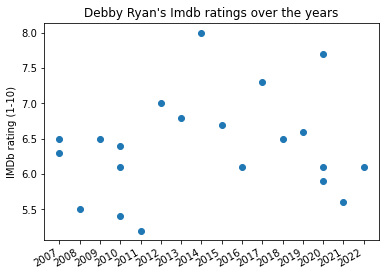

In [17]:
movie_year, celeb, num = movie_ratings_over_time(celebs,0)
for year in movie_year:
        for rating in movie_year[year]:
            plt.scatter(year, rating, c=['#1f77b4'])

plt.xticks(rotation=30, ha='right')
plt.title(
    f"{celeb.columns[num].split(',')[0]}'s Imdb ratings over the years")
plt.ylabel("IMDb rating (1-10)")
plt.show()

The output creates a scatter plot which can help find trends in the IMDb ratings over an actor's career.   
We can use the function `do_for_all` which takes a data filtering function and a data plotting function for one actor as input and performs it on all the actors in the data. Running `data_analysis.py` uses the `do_for_all` function on all the data analysis functions we have created and saves the output in separate folders. 

# Results

We generated over a 100 plots of 3 different types for each actor in the data. We went through the graphs and picked out ones which had clear trends in the data. We used different statistical functions for each type of plot choosing the ones which best represented the data. Things like outliers, total number of data points, etc. helped us choose the right way to create plots for different data. Below we have plotted a few plots with clear trends of data.

Text(0, 0.5, 'IMDb rating (1-10)')

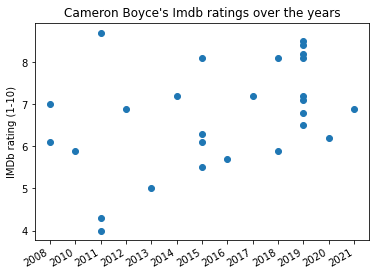

In [18]:
movie_year, celeb, num = movie_ratings_over_time(celebs,2)
for year in movie_year:
        for rating in movie_year[year]:
            plt.scatter(year, rating, c=['#1f77b4'])

plt.xticks(rotation=30, ha='right')
plt.title(
    f"{celeb.columns[num].split(',')[0]}'s Imdb ratings over the years")
plt.ylabel("IMDb rating (1-10)")

Text(0, 0.5, 'Money earned (USD)')

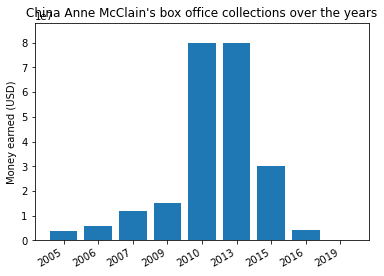

In [19]:
box_office, celeb, num = box_office_over_time(celebs,28)
highest_box_office = list(sorted(box_office.values()))[-1]
plt.bar(box_office.keys(), box_office.values())
plt.xticks(rotation=30, ha='right')
plt.title(
    f"{celeb.columns[num].split(',')[0]}'s box office collections over the years")
plt.ylim((0, float(highest_box_office)*1.1))
plt.ylabel("Money earned (USD)")

Text(0, 0.5, 'number of movies')

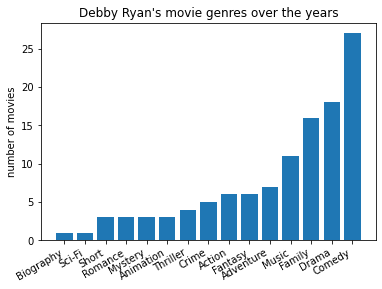

In [20]:
show_genre, celeb, num = genres_over_career(celebs, 0)
plt.bar(show_genre.keys(), show_genre.values())
plt.xticks(rotation=30, ha='right')
plt.title(
    f"{celeb.columns[num].split(',')[0]}'s movie genres over the years")
plt.ylabel("number of movies")

Seeing increasing or decreasing trends in the rating and box office collection plots helps us determine if an actor had a "successful" career. Looking at the genre data we can find out if the actor stayed in their comfort zone i.e. is the same genre as their disney show or if they tried to explore their acting skills. These results can give us a general idea of an actor's career trajectory.

Looking over all our results, it seems that Disney actors don’t have as high of a rate of stardom as we first thought. Many of the actors fizzle out after their shows, only playing in smaller or one-off movies here and there. It seems very rare from our data that an actor, even starting at Disney will hit their big break in the film industry. The only seemingly successful actor we found seemed to be Zendaya, who since leaving her role in the show Shake It Up has gone on to act in and even star in a plethora of well-known films and shows.

# Conclusion

### Challenges:
* An initial challenge we faced was figuring out the best way to store the data locally so that we don't have to web scrape every time to generate plots. We started by simply writing a dictionary to a text file but found out that it was not a good idea to evaluate python expressions from string based input. We decided that the best way to store out data would be in a json file since out data was very nested. We also found a convenient function to convert from json to DataFrames and decided to finalize using a json file to store data. Ideally we wanted to use relational DataFrames but by the time we thought of it we had already built a few data cleaning functions using the json and decided to continue with it.

* The next big challenge was figuring out the best statistical function to get insights from the data. For e.g. for IMDb ratings we started by using bar graphs to show average ratings per year. We found out that averages can be easily skewed by outliers in the data and would not be the most accurate representation. We then thought of using box plots since they handled outliers better.
But we noticed that for some movies we only had 2-3 movies per year and using box plots also didn't make sense. We finally decided on using a scatter plot to get the most accurate representation of the data. We followed a similar process for other types of plots, switching up and experimenting on statistical functions.

### Future ideas:
If we had to spend more time on the project, we would store the data in a more accessible way and research more parameters to measure an actor's success. Money earned and movie ratings are not the only parameters that determine a successful acting career. 